<a href="https://colab.research.google.com/github/planet-c-am/bar-chart/blob/main/Top%2010%20States%20by%20Total%20Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1808059669.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_yoy, x='State', y='YoY_%', ax=ax, palette='Spectral')


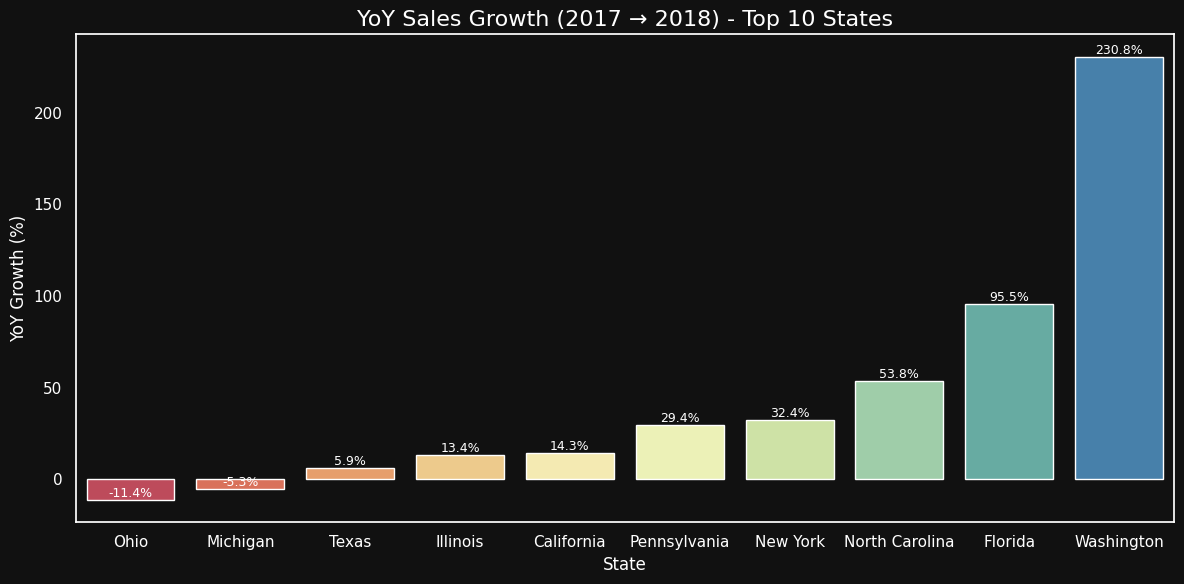

In [2]:
# @title Bar Chart – Top 10 States by Total Sales
#================================================================logical part===============================================================
# step 1: import requard libraies function
import numpy as np
import pandas as pd
from dateutil import parser

# step 2: load data
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vR-6XYWtaoxDCiZOi6PQODs_ubL08CvVzL6Q39LOquPGDTCAMQ3xjTpRLDereRI011A7lbxIS7iXsWU/pub?gid=574248564&single=true&output=csv")

# step 3: date parsing function
def try_parse_date(x):
  try:
    return parser.parse(x, dayfirst = False)
  except:
    try:
      return parser.parse(x, dayfirst = True)
    except:
      return pd.NaT

# step 4: clean data
df['Order Date'] = df['Order Date'].apply(try_parse_date)
df = df[df['Order Date'].notna()]
df = df[df['Sales'].notna() & (df['Sales']>0)]

# step 5: filter data
df_2018 = df[df['Order Date'].dt.year==2018]

# step 6: top 10 state in 2018
top_10_states = df_2018.groupby('State')['Sales'].sum().nlargest(10).sort_values(ascending=True)

#================================================================Design part===============================================================

# step 1: import required libraries function
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# step 2: theme/style
sns.set_theme(style='dark', rc={
    'axes.facecolor':'#111111',
    'figure.facecolor':'#111111',
    'xtick.color':'white',
    'ytick.color':'white',
    'text.color':'white'
})


# step 3: figure size
plt.figure(figsize=(10,6))


# step 4: barplot
# bar = vertical
# barh = horizontal
ax = top_10_states.plot(kind='bar', color='skyblue', edgecolor='black')

# step 5: title, xlabel, ylabel
plt.title('Top 10 State Sales   for 2018', color='white', fontsize=16)
plt.xlabel('State', color ='white', fontsize=16)
plt.ylabel('Sales', color ='white', fontsize=16)
plt.xticks(rotation=0)


# Optional: annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'${height:,.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

# step 6: final layout
plt.tight_layout()
plt.show()

